# Исследование данных о продажах игр

### Цель работы:

 выявить закономерности определяющие успешность игры. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.   
 Исходные данные - исторические данные о продажах игр до 2016 года, оценки пользователей и экспертов, жанры и платформы доступные из открытых источников.  
 
 Описание данных:  
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.  

Необходимо решить следующие задачи:
- выполнить предобработку данных и изучить их
- провести исследовательский анализ данных
- составить портрет пользователя каждого региона
- проверить гипотезы:  
Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;  
Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.


### Данные, общая информация о данных.

In [1]:
import seaborn as sb
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np
import pandas as pd

In [2]:
try:
    data = pd.read_csv('games.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

In [3]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


**Oсновная информация о датафрейме.**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Количество пропусков в исходных данных.**

In [5]:
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

**Дубликаты**

In [6]:
data.duplicated().sum()

0

Явные дубликаты отсутствуют.

### Предобработка данных

Заменим названия столбцов (приведем к нижнему регистру).

In [7]:
data.columns = data.columns.str.lower()

**Замена пропусков.**

Удалим строки с пропусками в `year_of_release`. Пропуски в данном столбце не возможно заменить ни средним, ни медианой, выполнить в ручную поиск 269 релизов игр не реально. Так как данные с пропусками в `year_of_release` составляют 1,6%  от исходных данных считаю возможным их удалить без вреда для последующих вычислений.

In [8]:
data = data.dropna(subset=['year_of_release'])

In [9]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [10]:
data['user_score'].value_counts()

tbd    2376
7.8     322
8       285
8.2     276
8.3     252
       ... 
0.2       2
0.6       2
0.7       2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64

В столбце `user_score` встречается аббревиатура 'tbd' (англ. to be determined - 'будет определено'), принимаем как отсутствие значения и заменяем на NaN, так как NaN замещает отсутствующее число, имеет тип данных float, с ними можно проводить математические операции (и в столбце уже есть 6701 NaN).

In [11]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = np.nan

Для замены пропусков в столбце `rating` используем значения-заглушки 'abc', чтобы игры без рейтинга не оказались полностью исключенными из анализа.

In [12]:
data['rating'] = data['rating'].fillna(value='abc')

**Изменение типов данных.**

Изменим тип данных в столбцах `year_of_release` на integer, так как год это целое число, и `user_score` на float.

In [13]:
data = data.astype({'year_of_release':int}, errors='ignore')
data['user_score'] = pd.to_numeric(data['user_score'])

In [14]:
data.dtypes

name                object
platform            object
year_of_release      int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object

Посчитаем суммарные продажи во всех регионах и запишим их в отдельный столбец `sum_sales`.

In [15]:
#data['sum_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [16]:
data['sum_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [17]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,abc,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,abc,31.38


Причины появления пропусков в исходных данных делятся на две большие группы: технологические, и причины обусловленные человеческим фактором.
Технологические причины порождают пропуски при копировании, считывании, смене формата. Сбой может произойти даже во время записи данных.  Пропуски вызванные человеческим фактором связаны с ошибками или нежеланием человека предоставлять информацию.

### Исследовательский анализ данных


Посмотрим, сколько игр выпускалось в разные годы.

In [18]:
data.groupby('year_of_release')['name'].count()

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

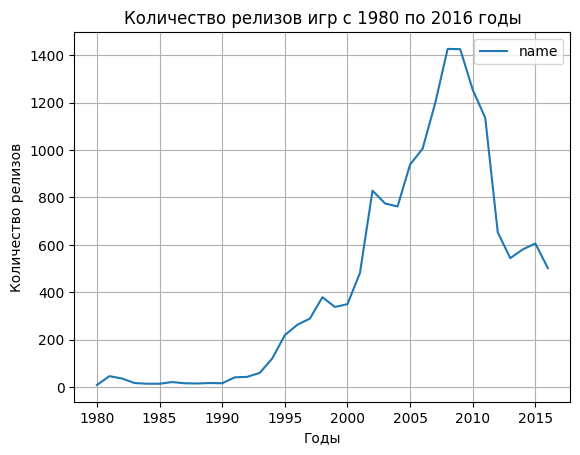

In [19]:
(data.pivot_table(index='year_of_release', values='name', aggfunc='count')
     .sort_values(by='year_of_release', ascending=False)
     .plot(grid=True, title='Количество релизов игр с 1980 по 2016 годы')
)
plt.ylabel('Количество релизов')
plt.xlabel('Годы');

Для определения закономерностей успешности игр наиболее значим период с 1994 года. Начиная с этого времени в год выходит больше сотни игр и прослеживается уверенный рост релизов вплоть до 2008 года - выход на плато. С 2010 количество релизов в год сокращается.

Рассмотрим как менялись продажи по платформам.

In [20]:
(data.pivot_table(index='platform', values='sum_sales', aggfunc=sum)
    .sort_values(by='sum_sales', ascending=False)
)

,sum_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


Лидирующие положения по суммарным продажам занимают платформы PS2, X360 и PS3.  
Рассмотрим платформы с наибольшими суммарными продажами, где `sum_sales` превосходит 250 миллионов проданных копий, первые 12 позиций в предыдущей таблице.

In [21]:
tabl = (data.pivot_table(index='platform', values='sum_sales', aggfunc=sum)
    .sort_values(by='sum_sales', ascending=False)
    .head(12)
)

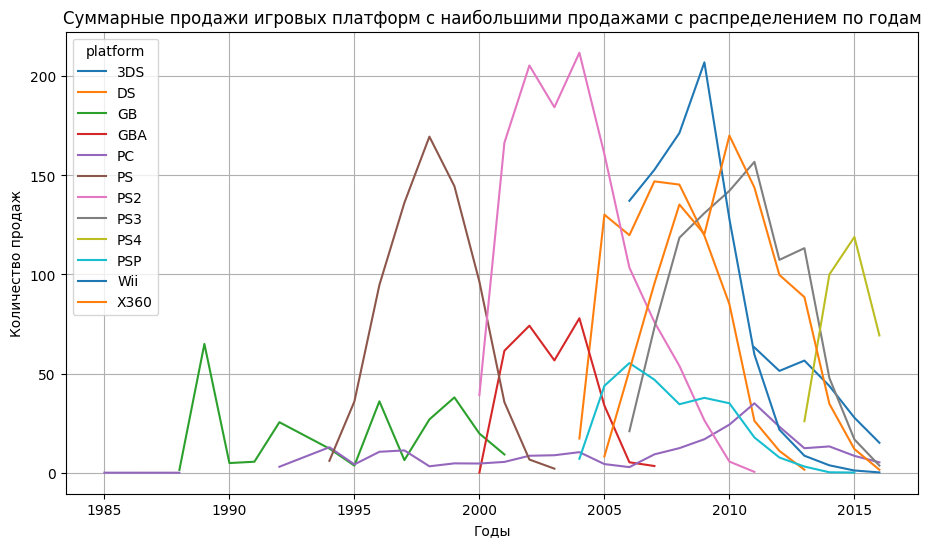

In [22]:
(data.query('platform in @tabl.index')
  .pivot_table(index='year_of_release', columns='platform', values='sum_sales', aggfunc=sum)
  .plot(grid=True, figsize=(11, 6), title='Суммарные продажи игровых платформ с наибольшими продажами с распределением по годам')
)
plt.ylabel('Количество продаж')
plt.xlabel('Годы');

На графике видно, что в среднем платформы 'живут' 10 лет, за этот характерный срок появляются новые и исчезают старые платформы.  
Определим актуальный период - с 1994 по 2016. В этот период времени начинается рост релизов игр и появляются платформы с наибольшими суммарными продажами.

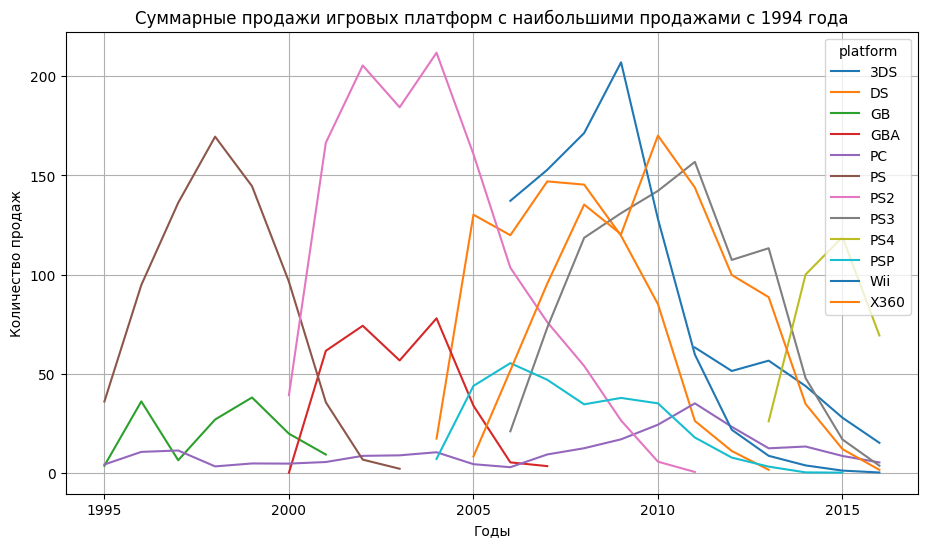

In [23]:
(data.query('platform in @tabl.index and year_of_release > 1994')
     .pivot_table(index='year_of_release', columns='platform', values='sum_sales', aggfunc=sum)
     .plot(grid=True, figsize=(11, 6), title='Суммарные продажи игровых платформ с наибольшими продажами с 1994 года')
)
plt.ylabel('Количество продаж')
plt.xlabel('Годы');

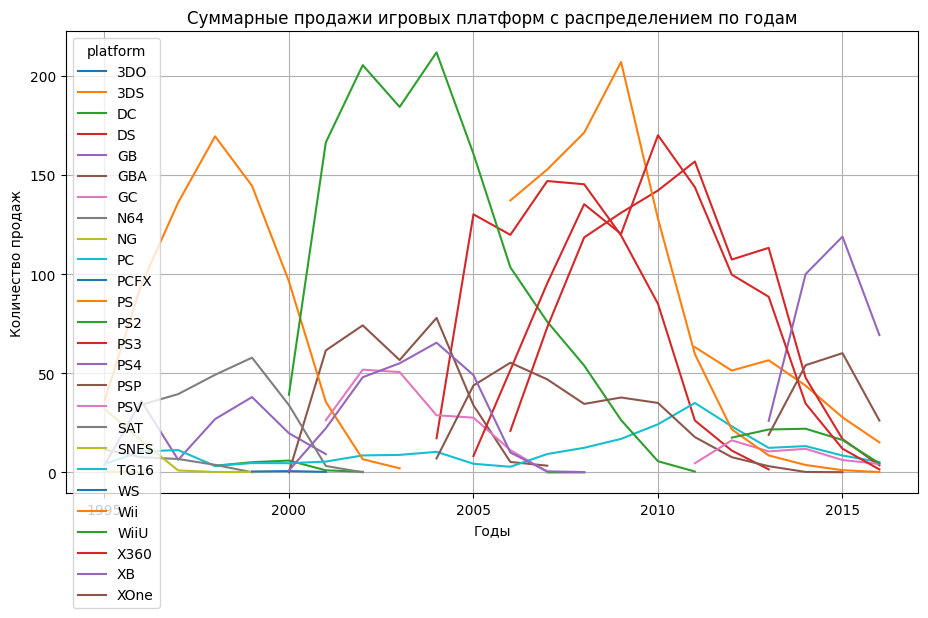

In [24]:
(data.query('year_of_release > 1994')
     .pivot_table(index='year_of_release', columns='platform', values='sum_sales', aggfunc=sum)
     .plot(grid=True, figsize=(11, 6), title='Суммарные продажи игровых платформ с распределением по годам')
)
plt.ylabel('Количество продаж')
plt.xlabel('Годы');

In [25]:
data = data.query('year_of_release > 1994')

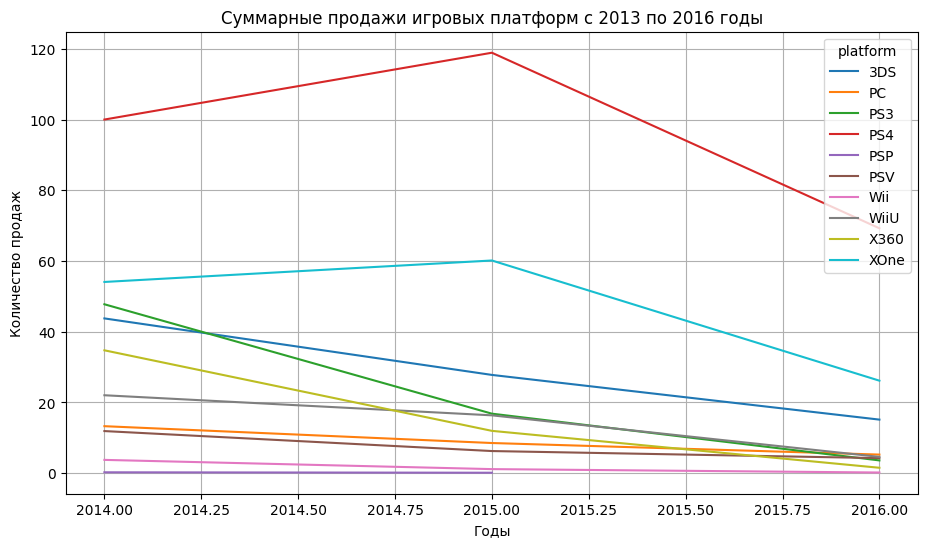

In [26]:
(data.query('year_of_release > 2013')
    .pivot_table(index='year_of_release', columns='platform', values='sum_sales', aggfunc=sum)
    .plot(grid=True, figsize=(11, 6), title='Суммарные продажи игровых платформ c 2013 по 2016 годы')
)
plt.ylabel('Количество продаж')
plt.xlabel('Годы');

С 2010 количество релизов в год сокращается. Так же с 2010 года прослеживается тенденция снижения количества проданных копий игр на всех платформах с небольшими исключениями. У игровых платформ, появившихся после 2010 года, таких как PS4, XOne есть рост в количестве проданных копий, но небольшой и в 2015 так же наблюдается снижение в продаже.  
Рассматриваю потенциально прибыльными те игровые полатформы, у которых есть продажи после 2013 года.

In [27]:
tabl_2 = (data.query('year_of_release > 2013')
    .pivot_table(index='year_of_release', columns='platform', values='sum_sales', aggfunc=sum)
)
tabl_2

platform,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,
2014,43.76,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


Рассмотрим глобальные продажи игр в разбивке по платформам для потенциально прибыльных игровых полатформ.

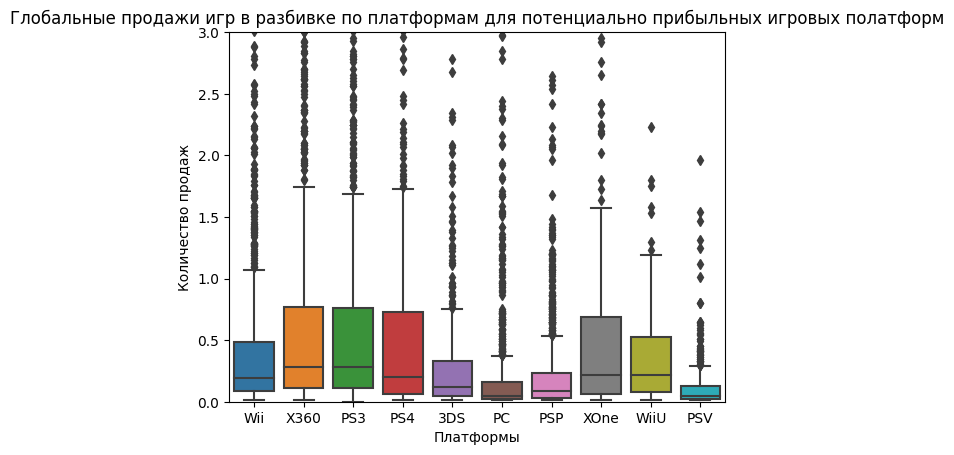

In [28]:
plt.ylim(0, 3)
sb.boxplot(x=data.query('platform in @tabl_2')['platform'], y=data['sum_sales'])
plt.title('Глобальные продажи игр в разбивке по платформам для потенциально прибыльных игровых полатформ')
plt.ylabel('Количество продаж')
plt.xlabel('Платформы');

Данные глобальным продажам игр в разбивке по платформам очень неоднородные, большое количество выбросов для всех платформ. Медианые значения для платформ не превышают значения 0.3 миллионы проданных копий.

Посмотрим, как влияют на продажи отзывы пользователей и критиков на примере платформы PS.

In [29]:
data.query('platform == "PS"').head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
52,Gran Turismo,PS,1997,Racing,4.02,3.87,2.54,0.52,96.0,8.7,E,10.95
65,Final Fantasy VII,PS,1997,Role-Playing,3.01,2.47,3.28,0.96,92.0,9.2,T,9.72
67,Gran Turismo 2,PS,1999,Racing,3.88,3.42,1.69,0.50,93.0,9.0,T,9.49
88,Final Fantasy VIII,PS,1999,Role-Playing,2.28,1.72,3.63,0.23,90.0,8.6,T,7.86
95,Crash Bandicoot 2: Cortex Strikes Back,PS,1997,Platform,3.78,2.17,1.31,0.31,NaN,NaN,abc,7.57


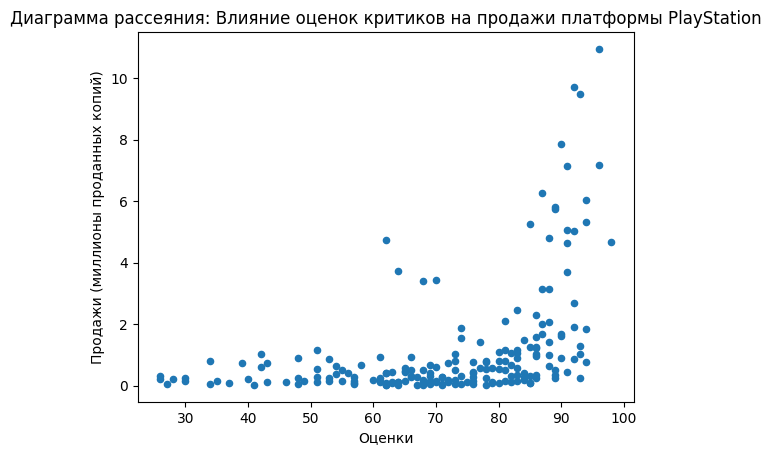

In [30]:
data.query('platform == "PS"').plot(x="critic_score", y='sum_sales', kind='scatter')
plt.title('Диаграмма рассеяния: Влияние оценок критиков на продажи платформы PlayStation')
plt.xlabel('Оценки')
plt.ylabel('Продажи (миллионы проданных копий)');

In [31]:
data.query('platform == "PS"')['sum_sales'].corr(data.query('platform == "PS"')['critic_score'])

0.44675216401586554

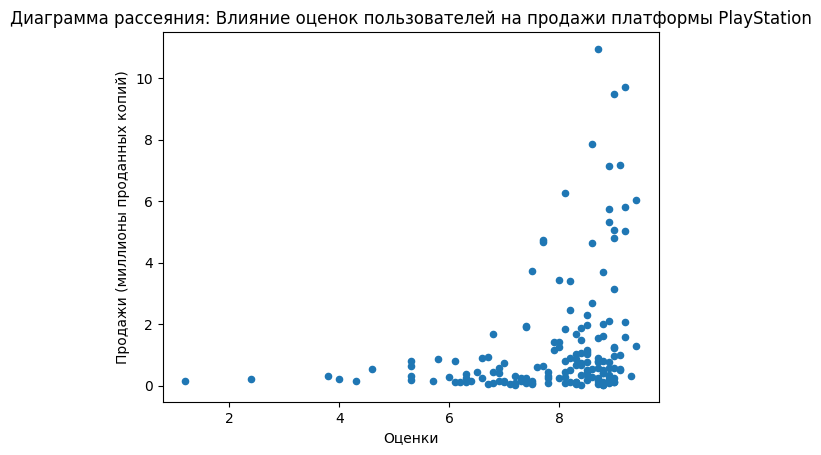

In [32]:
data.query('platform == "PS"').plot(x="user_score", y='sum_sales', kind='scatter')
plt.title('Диаграмма рассеяния: Влияние оценок пользователей на продажи платформы PlayStation')
plt.xlabel('Оценки')
plt.ylabel('Продажи (миллионы проданных копий)');

In [33]:
data.query('platform == "PS"')['sum_sales'].corr(data.query('platform == "PS"')['user_score'])

0.30105418974386505

Между отзывами пользователей и критиков и продажами видна положительная корреляция. Высокие глобальным продажам наблюдаются при высоких оценках критиков и пользователей.

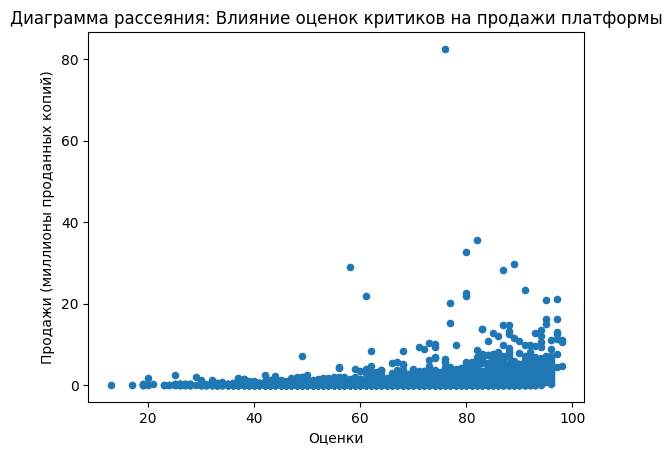

In [34]:
data.query('platform in @tabl.index').plot(x="critic_score", y='sum_sales', kind='scatter')
plt.title('Диаграмма рассеяния: Влияние оценок критиков на продажи платформы')
plt.xlabel('Оценки')
plt.ylabel('Продажи (миллионы проданных копий)');

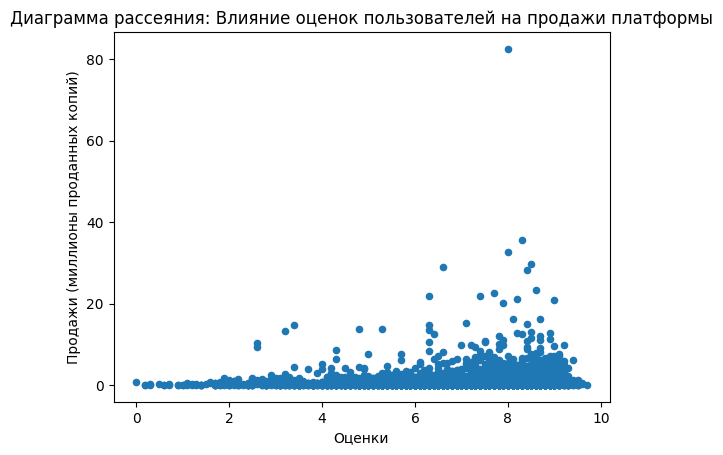

In [35]:
data.query('platform in @tabl.index').plot(x="user_score", y='sum_sales', kind='scatter')
plt.title('Диаграмма рассеяния: Влияние оценок пользователей на продажи платформы')
plt.xlabel('Оценки')
plt.ylabel('Продажи (миллионы проданных копий)');

Та же зависимость прослеживается для всех плаатформ.

Общее распределение игр по жанрам.

In [36]:
tab_one = data.pivot_table(index='genre', values='name', aggfunc='count').sort_values(by='name', ascending=False)

tab_two = (data.pivot_table(index='genre', values='sum_sales', aggfunc='median')
              .sort_values(by='sum_sales', ascending=False)
)
tab_one.join(tab_two)

,name,sum_sales
genre,,
Action,3222,0.180
Sports,2238,0.220
Misc,1701,0.160
Role-Playing,1434,0.180
Adventure,1280,0.050
Shooter,1247,0.220
Racing,1203,0.180
Simulation,842,0.150
Platform,808,0.240


In [37]:
(data.pivot_table(index='genre', values='sum_sales', aggfunc='median')
              .sort_values(by='sum_sales', ascending=False)
)

,sum_sales
genre,
Platform,0.240
Shooter,0.220
Sports,0.220
Fighting,0.200
Action,0.180
Racing,0.180
Role-Playing,0.180
Misc,0.160
Simulation,0.150


Количество продаж стльно разнится. Есть жанры с высокими и низкими продажами. Жанры Platform, Shooter, Sports, Fighting стабильно приносят высокий доход.

### Портрет пользователя каждого региона

In [38]:
(data.pivot_table(index='platform', values='na_sales', aggfunc=sum)
     .sort_values(by='na_sales', ascending=False)
     .head()
)

,na_sales
platform,
X360,595.74
PS2,572.92
Wii,486.87
PS3,390.13
DS,380.31


In [39]:
(data.pivot_table(index='platform', values='eu_sales', aggfunc=sum)
     .sort_values(by='eu_sales', ascending=False)
     .head()
)

,eu_sales
platform,
PS2,332.63
PS3,327.21
X360,268.32
Wii,258.32
PS,211.19


In [40]:
(data.pivot_table(index='platform', values='jp_sales', aggfunc=sum)
     .sort_values(by='jp_sales', ascending=False)
     .head()
)

,jp_sales
platform,
DS,175.00
PS2,137.54
PS,137.11
3DS,100.62
PS3,79.41


In [41]:
(data.pivot_table(index='genre', values='na_sales', aggfunc='median')
     .sort_values(by='na_sales', ascending=False)
     .head()
)

,na_sales
genre,
Platform,0.13
Shooter,0.12
Sports,0.11
Racing,0.10
Action,0.09


In [42]:
(data.pivot_table(index='genre', values='eu_sales', aggfunc='median')
     .sort_values(by='eu_sales', ascending=False)
     .head()
)

,eu_sales
genre,
Platform,0.05
Shooter,0.05
Racing,0.04
Action,0.03
Fighting,0.03


In [43]:
(data.pivot_table(index='genre', values='jp_sales', aggfunc='median')
     .sort_values(by='jp_sales', ascending=False)
     .head()
)

,jp_sales
genre,
Role-Playing,0.05
Adventure,0.01
Fighting,0.01
Action,0.00
Misc,0.00


In [44]:
data.pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc=sum)

,eu_sales,jp_sales,na_sales
rating,,,
AO,0.61,0.00,1.26
E,703.87,197.96,1274.24
E10+,183.33,40.20,345.50
EC,0.11,0.00,1.53
K-A,0.27,1.46,2.56
M,480.00,63.58,742.87
RP,0.03,0.00,0.00
T,420.73,150.17,747.19
abc,536.71,616.89,875.22


Популярности игровых платформ и жанров в регионах не одинаковые. Различия в долях продаж для платформ в регионов обусловлена разной численностью (Северная Америка - 579 млн, Европа  - 746 млн, Япония - 125,7 млн), покупательской способностью и популярностью компьютерных игр.   
Entertainment Software Rating Board (ESRB) — негосударственная организация, основное направление деятельности — принятие и определение рейтингов для компьютерных видеоигр и другого развлекательного программного обеспечения в США и Канаде.

Во всех регионая доля игр без рейтинга ESRB достаточно велика.

### Проверка гипотез

H0 Средние пользовательские рейтинги платформ Xbox One и PC равны.   
H1 Средние пользовательские рейтинги платформ Xbox One и PC не равны.

In [45]:
xbox_one = data.query('platform == "XOne"')['user_score'].dropna()
p_c = data.query('platform == "PC"')['user_score'].dropna()

alpha = 0.05 # уровень статистической значимости

results = st.ttest_ind(xbox_one, p_c, equal_var=False)

print('p-значение', results.pvalue)

if results.pvalue < alpha:  # сравним p-значение с заданным уровнем стат. значимости
    print('Отвергаем нулевую гипотезу.')
else:
    print('Не получилось отвергнуть нулевую гипотезу.')

p-значение 3.442937492775816e-06
Отвергаем нулевую гипотезу.


Гипотезу 'средние пользовательские рейтинги платформ Xbox One и PC одинаковые' отвергаем.

Для проверки найдём средние пользовательских рейтингов платформ Xbox One и PC.

In [46]:
data.query('platform == "XOne"')['user_score'].mean()

6.521428571428572

In [47]:
data.query('platform == "PC"')['user_score'].mean()

7.072606382978724

H0 Средние пользовательские рейтинги жанров Action и Sports равны.  
H1 Средние пользовательские рейтинги жанров Action и Sports не равны.

In [48]:
action = data.query('genre == "Action"')['user_score'].dropna()
sports = data.query('genre == "Sports"')['user_score'].dropna()

# уровень статистической значимости alpha определён в предыдущей ячейке

results = st.ttest_ind(action, sports, equal_var=False)

print('p-значение', results.pvalue)

if results.pvalue < alpha:  # сравним p-значение с заданным уровнем стат. значимости
    print('Отвергаем нулевую гипотезу.')
else:
    print('Не получилось отвергнуть нулевую гипотезу.')

p-значение 0.07370217419278534
Не получилось отвергнуть нулевую гипотезу.


Гипотезу 'средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные' отвергаем.

In [49]:
data.query('genre == "Action"')['user_score'].mean()

7.058129175946548

In [50]:
data.query('genre == "Sports"')['user_score'].mean()

6.951433857539316

Нулевая гипотеза всегда формулируется так, чтобы использовать знак равенства. В качестве альтернативной выбрана двусторонняя гипотеза. 

Выбран параметрический тест — критерий Стьюдента, так как в тесте достаточно много наблюдений (247 и 944 для первой гипотезы) и в распределениях нет совсем уж длинных хвостов. При этом характер распределения исходных наблюдений неважен.

### Общий вывод 
    

Выполнена предобработка исходных данных, добавлен новый столбец, проведен анализ.  
Выявлены закономерности определяющие успешность игры:
- игра должна быть доступна для актуальных, потенциально прибыльных игровых полатформ, таких как 3DS, PC, PS3, PS4, PSP, PSV, Wii, WiiU, X360, XOne. При выборе платформы необходимо учитывать регион реализации;
- игра должна быть в популярном жанре, стабильно приносящим высокий доход. Это Platform, Shooter, Sports или Fighting для Северной Америки и Европы. Role-Playing, Adventure, Fighting для Японии;
- для высоких продаж нужны высокие оценки критиков и пользователей;
- во всех регионая доля игр без рейтинга ESRB достаточно велика.  
В ходе работы определён портрет пользователя представленных регионов.  

Проведена проверка гипотез:
- гипотеза 'средние пользовательские рейтинги платформ Xbox One и PC одинаковые' отвергнута;
- гипотеза 'средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные' отвергнута.